In [196]:
import geopandas as gpd
import pandas as pd
from shapely import Point, Polygon
from matplotlib import pyplot
%matplotlib inline

## Dados brutos

In [197]:
# importando shapefile
zonas_bruto = gpd.read_file('./data/shapes/zonas/Zonas_2017_region.shp')
zonas_bruto['NumeroZona']

0        1
1        2
2        3
3        4
4        5
      ... 
512    513
513    514
514    515
515    516
516    517
Name: NumeroZona, Length: 517, dtype: int64

In [198]:
# importando csv
tipo_deslocamento_bruto = pd.read_csv('data/Tab17_OD2017.csv', sep=';')
tipo_deslocamento_bruto

,Zona,Coletivo,Individual,Modo Motorizado,Modo Nao Motorizado,Total,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,1.0,99472.0,17176.0,116648.0,43855.0,160503.0,NaN,NaN,NaN,NaN
1,2.0,82266.0,27434.0,109700.0,27531.0,137232.0,NaN,NaN,NaN,NaN
2,3.0,29068.0,9807.0,38875.0,24096.0,62971.0,NaN,NaN,NaN,NaN
3,4.0,33110.0,16764.0,49873.0,28311.0,78184.0,NaN,NaN,NaN,NaN
4,5.0,107281.0,25663.0,132944.0,53275.0,186220.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dados nao normalizados

In [199]:
tipo_deslocamento_bruto.dropna(how='all', axis=1, inplace=True) # removemos colunas com todos os itens NaN 
tipo_deslocamento_bruto.dropna(how='all', axis=0, inplace=True) # removemos linhas com todos os itens NaN
tipo_deslocamento_bruto.columns = [x.strip() for x in tipo_deslocamento_bruto.columns]

tipo_deslocamento_bruto['NumeroZona'] = tipo_deslocamento_bruto['Zona']
tipo_deslocamento = tipo_deslocamento_bruto.astype({'NumeroZona': 'int64'})
tipo_deslocamento

,Zona,Coletivo,Individual,Modo Motorizado,Modo Nao Motorizado,Total,NumeroZona
0,1.0,99472.0,17176.0,116648.0,43855.0,160503.0,1
1,2.0,82266.0,27434.0,109700.0,27531.0,137232.0,2
2,3.0,29068.0,9807.0,38875.0,24096.0,62971.0,3
3,4.0,33110.0,16764.0,49873.0,28311.0,78184.0,4
4,5.0,107281.0,25663.0,132944.0,53275.0,186220.0,5
...,...,...,...,...,...,...,...
512,513.0,976.0,1596.0,2572.0,396.0,2968.0,513
513,514.0,52357.0,44218.0,96575.0,60314.0,156889.0,514
514,515.0,54071.0,46897.0,100968.0,53983.0,154950.0,515
515,516.0,64903.0,95400.0,160304.0,53303.0,213607.0,516


In [200]:
merged = zonas_bruto.merge(tipo_deslocamento, on='NumeroZona')
merged

,NumeroZona,NomeZona,NumeroMuni,NomeMunici,NumDistrit,NomeDistri,Area_ha_2,geometry,Zona,Coletivo,Individual,Modo Motorizado,Modo Nao Motorizado,Total
0,1,Sé,36,São Paulo,80,Sé,57.10,"POLYGON Z ((333739.415 7394619.838 0.000, 3337...",1.0,99472.0,17176.0,116648.0,43855.0,160503.0
1,2,Parque Dom Pedro,36,São Paulo,80,Sé,113.64,"POLYGON Z ((333106.146 7395425.480 0.000, 3331...",2.0,82266.0,27434.0,109700.0,27531.0,137232.0
2,3,Praça João Mendes,36,São Paulo,80,Sé,47.75,"POLYGON Z ((333353.211 7393933.156 0.000, 3332...",3.0,29068.0,9807.0,38875.0,24096.0,62971.0
3,4,Ladeira da Memória,36,São Paulo,67,República,75.11,"POLYGON Z ((332742.619 7394795.328 0.000, 3327...",4.0,33110.0,16764.0,49873.0,28311.0,78184.0
4,5,República,36,São Paulo,67,República,74.95,"POLYGON Z ((332983.962 7395262.578 0.000, 3330...",5.0,107281.0,25663.0,132944.0,53275.0,186220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,513,Quatro Encruzilhadas,17,Itapevi,113,Itapevi,2101.43,"POLYGON Z ((300336.368 7389696.621 0.000, 3003...",513.0,976.0,1596.0,2572.0,396.0,2968.0
513,514,Itapevi,17,Itapevi,113,Itapevi,1070.03,"POLYGON Z ((303326.146 7397176.350 0.000, 3033...",514.0,52357.0,44218.0,96575.0,60314.0,156889.0
514,515,Amador Bueno,17,Itapevi,113,Itapevi,5113.23,"POLYGON Z ((303292.377 7397174.790 0.000, 3033...",515.0,54071.0,46897.0,100968.0,53983.0,154950.0
515,516,Santana de Parnaíba,31,Santana de Parnaíba,127,Santana de Parnaíba,18034.76,"POLYGON Z ((296271.998 7398946.927 0.000, 2961...",516.0,64903.0,95400.0,160304.0,53303.0,213607.0


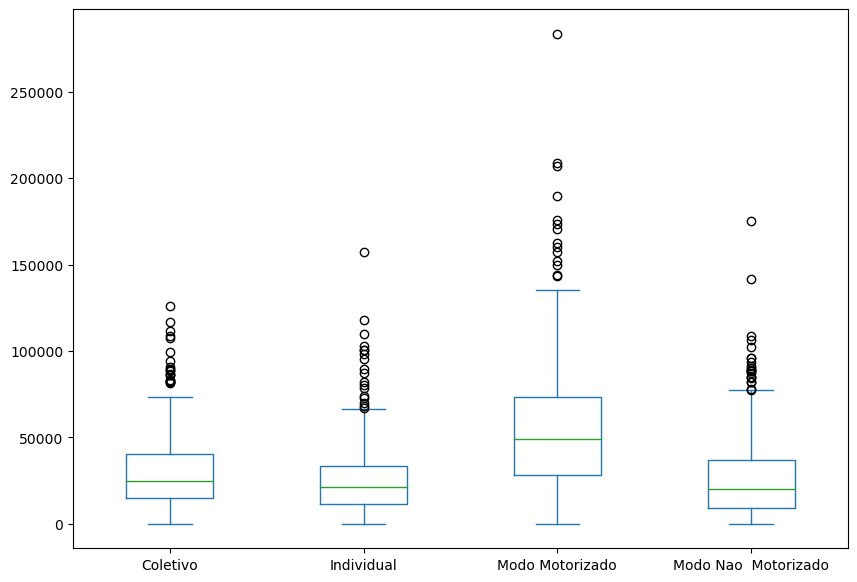

In [202]:
tipos = tipo_deslocamento[['Coletivo', 'Individual', 'Modo Motorizado', 'Modo Nao  Motorizado']]
ax = tipos.plot.box(figsize=(10,7))

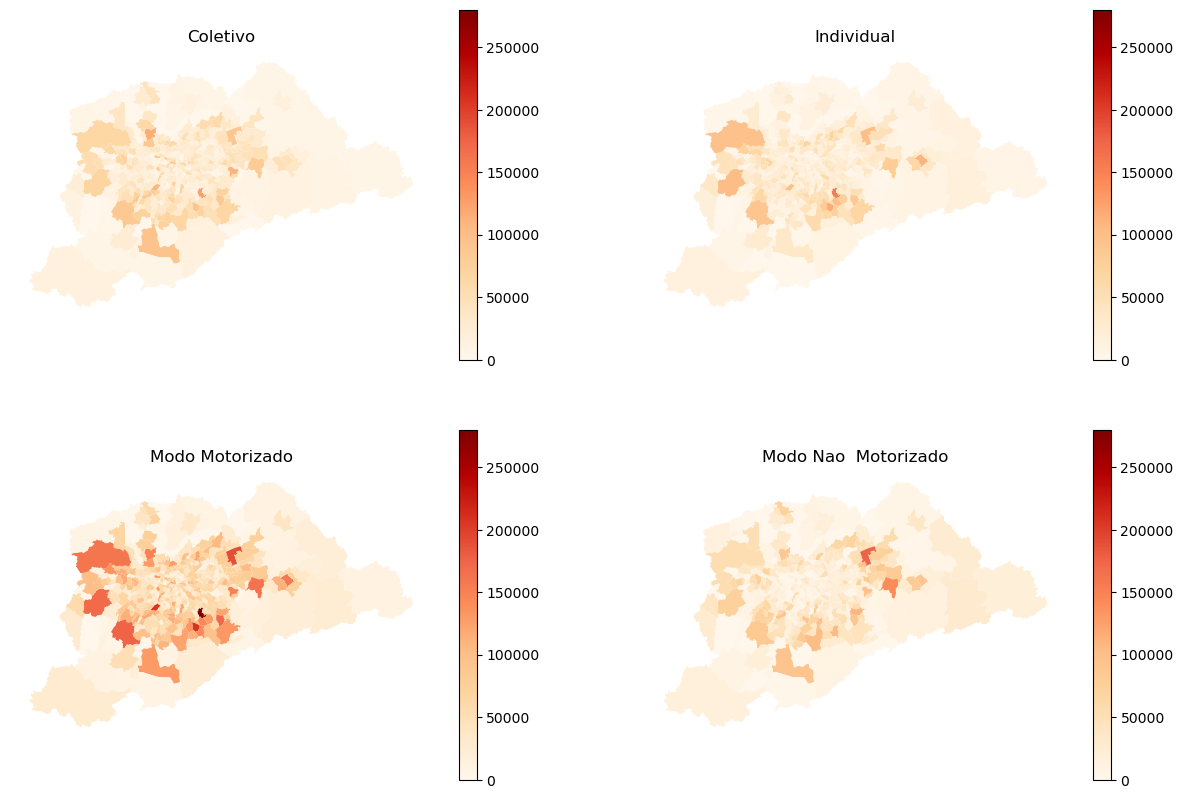

In [206]:
fig, ax = pyplot.subplots(2,2)

merged.plot(column='Coletivo', cmap='OrRd', ax=ax[0,0], vmin=0, vmax=280000, legend=True)
ax[0,0].set_title('Coletivo')
ax[0,0].axis('off')

merged.plot(column='Individual', cmap='OrRd', ax=ax[0,1], vmin=0, vmax=280000, legend=True)
ax[0,1].set_title('Individual')
ax[0,1].axis('off')

merged.plot(column='Modo Motorizado', cmap='OrRd', ax=ax[1,0], vmin=0, vmax=280000, legend=True)
ax[1,0].set_title('Modo Motorizado')
ax[1,0].axis('off')

merged.plot(column='Modo Nao  Motorizado', cmap='OrRd', ax=ax[1,1], vmin=0, vmax=280000, legend=True)
ax[1,1].set_title('Modo Nao  Motorizado')
ax[1,1].axis('off')

fig.set_figheight(10)
fig.set_figwidth(15)

## Dados normalizados - min-max

In [204]:
tipo_deslocamento_normalizado = tipo_deslocamento.copy()

max_coletivo = tipo_deslocamento['Coletivo'].max()
min_coletivo = tipo_deslocamento['Coletivo'].min()
tipo_deslocamento_normalizado['Coletivo'] = (tipo_deslocamento_normalizado['Coletivo'] - min_coletivo) / (max_coletivo - min_coletivo)

max_individual = tipo_deslocamento['Individual'].max()
min_individual = tipo_deslocamento['Individual'].min()
tipo_deslocamento_normalizado['Individual'] = (tipo_deslocamento_normalizado['Individual'] - min_individual) / (max_individual - min_individual)

max_motorizado = tipo_deslocamento['Modo Motorizado'].max()
min_motorizado = tipo_deslocamento['Modo Motorizado'].min()
tipo_deslocamento_normalizado['Modo Motorizado'] = (tipo_deslocamento_normalizado['Modo Motorizado'] - min_motorizado) / (max_motorizado - min_motorizado)

max_nao_motorizado = tipo_deslocamento['Modo Nao  Motorizado'].max()
min_nao_motorizado = tipo_deslocamento['Modo Nao  Motorizado'].min()
tipo_deslocamento_normalizado['Modo Nao  Motorizado'] = (tipo_deslocamento_normalizado['Modo Nao  Motorizado'] - min_nao_motorizado) / (max_nao_motorizado - min_nao_motorizado)

tipo_deslocamento_normalizado = tipo_deslocamento_normalizado.drop(columns=['Total', 'Zona'])
tipo_deslocamento_normalizado

,Coletivo,Individual,Modo Motorizado,Modo Nao Motorizado,NumeroZona
0,0.787716,0.109215,0.411387,0.250330,1
1,0.651462,0.174441,0.386883,0.157150,2
2,0.230189,0.062359,0.137102,0.137543,3
3,0.262197,0.106595,0.175889,0.161603,4
4,0.849555,0.163180,0.468859,0.304100,5
...,...,...,...,...,...
512,0.007729,0.010148,0.009071,0.002260,513
513,0.414614,0.281163,0.340595,0.344280,514
514,0.428187,0.298198,0.356088,0.308141,515
515,0.513965,0.606608,0.565350,0.304260,516


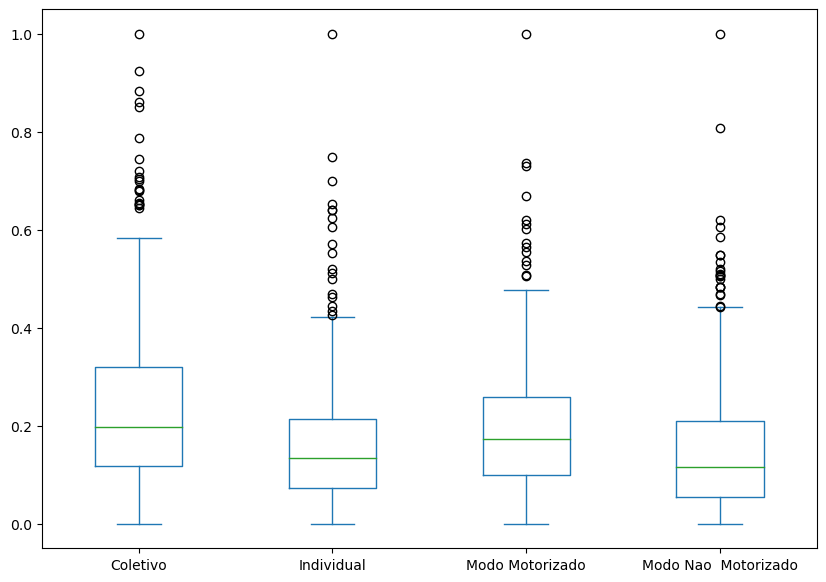

In [207]:
tipos = tipo_deslocamento_normalizado[['Coletivo', 'Individual', 'Modo Motorizado', 'Modo Nao  Motorizado']]
ax = tipos.plot.box(figsize=(10,7))

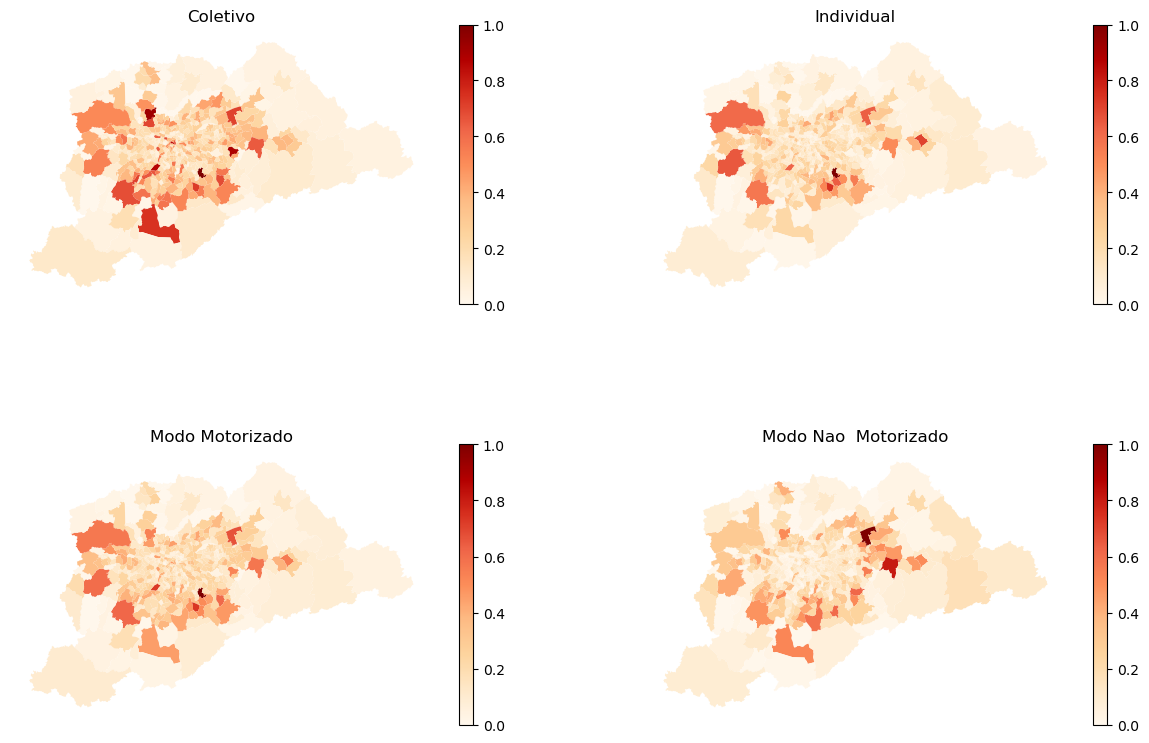

In [222]:
fig, ax = pyplot.subplots(2,2)

merged_normalizado.plot(column='Coletivo', cmap='OrRd', ax=ax[0,0], legend=True, legend_kwds={'shrink': 0.8})
ax[0,0].set_title('Coletivo')
ax[0,0].axis('off')

merged_normalizado.plot(column='Individual', cmap='OrRd', ax=ax[0,1], legend=True, legend_kwds={'shrink': 0.8})
ax[0,1].set_title('Individual')
ax[0,1].axis('off')

merged_normalizado.plot(column='Modo Motorizado', cmap='OrRd', ax=ax[1,0], legend=True, legend_kwds={'shrink': 0.8})
ax[1,0].set_title('Modo Motorizado')
ax[1,0].axis('off')

merged_normalizado.plot(column='Modo Nao  Motorizado', cmap='OrRd', ax=ax[1,1], legend=True, legend_kwds={'shrink': 0.8})
ax[1,1].set_title('Modo Nao  Motorizado')
ax[1,1].axis('off')

fig.set_figheight(10)
fig.set_figwidth(15)

## Dados normalizados - Quantile